In [1]:
#!source ~/.bashrc; conda activate ml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv("/home/azareie/PRIMUS/data/83_BIOINFORMATICS/Ashkan/IMS Run1.csv")

In [3]:
df

,samples,group,35.039,37.030,42.058,43.076,45.058,46.040,53.015,55.015,...,911.645,912.645,913.663,914.654,915.646,931.603,933.622,949.625,950.634,965.618
0,0177_095,CTR,49.6590,16.6648,0.0577,0.0587,0.8010,0.1186,0.0708,0.0371,...,1.7489,1.0691,3.7057,2.1324,1.0599,0.6249,0.6635,0.6651,0.5825,0.5141
1,0178_072,CTR,51.1055,16.6937,0.0558,0.0554,0.8238,0.1434,0.0644,0.0302,...,1.1691,0.7830,2.1740,1.3440,0.7726,0.6404,0.6293,0.6405,0.5516,0.5592
2,0175_103,BM1,63.1277,22.2902,0.0664,0.0721,1.1325,0.1584,0.0938,0.0401,...,1.9883,1.2458,3.5572,2.0854,1.1997,0.7485,0.7926,0.8200,0.6824,0.6894
3,0182_097,BM1,42.7899,13.8133,0.0772,0.0874,0.5773,0.1288,0.0683,0.0460,...,1.3460,0.9228,2.3364,1.4624,1.0004,1.0945,1.1213,1.1957,0.8277,0.6657
4,0174_093,TG1,55.3103,18.1652,0.1066,0.1323,0.6507,0.1648,0.0928,0.0582,...,1.0128,0.7517,1.7912,1.1559,0.8686,1.0119,1.1496,1.2797,0.8841,0.6964
5,0179_089,TG1,67.5499,22.7749,0.0826,0.1010,0.8637,0.1512,0.1061,0.0469,...,0.9035,0.6972,1.5092,1.0065,0.8629,1.0853,1.1093,1.3350,0.9252,0.7381
6,0184_080,TG1,41.3938,13.2303,0.0809,0.0959,0.9839,0.1489,0.0630,0.0378,...,1.5967,1.0483,2.7213,1.6397,1.2132,1.3329,1.3759,1.4726,0.9700,0.7554


In [4]:
dfproc = df.copy()
dfproc = dfproc.drop('samples', axis=1)

In [5]:
X = dfproc.loc[:, dfproc.columns != 'group']
y = dfproc.group.values.reshape(-1, 1)
#le = preprocessing.LabelEncoder()
#newx = le.fit_transform(dfproc.group.values)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [61]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(x_train,y_train)

/ssd/azareie/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred = rfmodel.predict(x_test)

In [63]:
print("y_pred:", y_pred.reshape(1,-1))
print("y_test:", y_test.reshape(1,-1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred: [['TG1' 'TG1']]
y_test: [['BM1' 'TG1']]
Accuracy: 0.5


In [73]:
feature_imp = pd.Series(rfmodel.feature_importances_,index=list(X.columns)).sort_values(ascending=False)
most_imp_features = feature_imp[feature_imp > 0.012]
most_imp_features
feature_imp

333.209    0.027193
332.245    0.027193
405.068    0.021053
483.001    0.017293
385.164    0.017293
             ...   
424.054    0.000000
425.126    0.000000
426.054    0.000000
427.063    0.000000
35.039     0.000000
Length: 540, dtype: float64

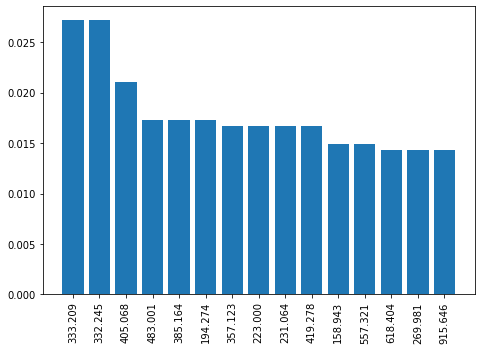

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(most_imp_features.index,most_imp_features)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [55]:
feature_imp.describe()

count    540.000000
mean       0.001852
std        0.001794
min        0.000000
25%        0.000000
50%        0.001103
75%        0.003308
max        0.008820
dtype: float64

In [247]:
impX = X[list(feature_imp[feature_imp > 0.0025].index)]
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(impX, y, test_size=0.8)

In [248]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("y_pred:", y_pred.reshape(1,-1))
print("y_test:", y_test.reshape(1,-1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred: [['TG1' 'TG1' 'TG1' 'TG1' 'TG1' 'TG1']]
y_test: [['TG1' 'CTR' 'BM1' 'CTR' 'TG1' 'BM1']]
Accuracy: 0.3333333333333333


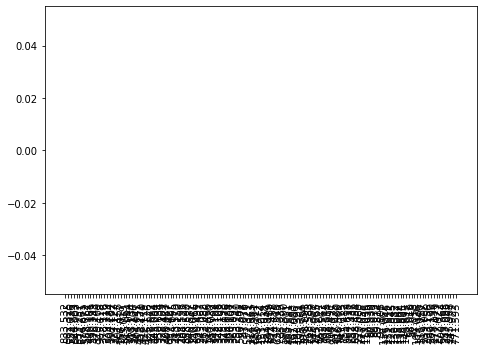

In [251]:
import matplotlib.pyplot as plt

feature_imp = pd.Series(clf.feature_importances_,index=list(impX.columns)).sort_values(ascending=False)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(feature_imp.index,feature_imp)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [257]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

In [345]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(540, activation='relu', input_shape=(540,)))

# Add hidden layers
#model.add(Dense(100, activation='relu'))

#model.add(Dense(20, activation='relu'))

model.add(Dense(20, activation='relu'))

# Add an output layer 
model.add(Dense(3, activation='softmax'))

In [445]:
X = dfproc.loc[:, dfproc.columns != 'group']
y = dfproc.group.values.reshape(-1, 1)
le = preprocessing.LabelEncoder()
newy = le.fit_transform(dfproc.group.values)
x_train, x_test, y_train, y_test = train_test_split(X, newy, test_size=0.65)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(x_train, y_train, epochs=2000, batch_size=1, verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 60ms/step - loss: 9.1263 - accuracy: 0.0000e+00
Epoch 2/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.2209 - accuracy: 0.5000
Epoch 3/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3240 - accuracy: 1.0000
Epoch 4/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.1394 - accuracy: 1.0000
Epoch 5/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 1.0000
Epoch 6/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 1.0000
Epoch 7/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 1.0000
Epoch 8/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.0530 - accuracy: 1.0000
Epoch 9/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 10/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 11/2000


In [446]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[[1.2871377e-12 1.6255317e-02 9.8374462e-01]
 [4.5937656e-14 5.5448657e-01 4.4551346e-01]
 [6.0885019e-11 2.0972726e-07 9.9999976e-01]
 [1.1488906e-13 8.0274804e-05 9.9991977e-01]
 [9.4946221e-16 9.4974476e-01 5.0255295e-02]]
[2 2 0 1 0]


In [348]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

5/5 [==============================] - 0s 5ms/step
[12.507214546203613, 0.0]


In [344]:
print(newy)
print(y)

[1 1 0 0 2 2 2]
[['CTR']
 ['CTR']
 ['BM1']
 ['BM1']
 ['TG1']
 ['TG1']
 ['TG1']]


In [372]:
dbscandata = StandardScaler().fit_transform(X)
type(dbscandata)
#ageing_cluster_metabolites = filter(lambda v: v==v, ageing_cluster_metabolites)
#ageing_cluster_metabolites = ageing_cluster_metabolites[~pd.isnull(ageing_cluster_metabolites)]
#ageing_cluster_metabolites = ageing_cluster_metabolites.reshape(-1, 1)

numpy.ndarray

In [370]:
dbscandata = dbscandata[~pd.isnull(dbscandata)]
#dbscandata = dbscandata.reshape(-1, 1)

In [376]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.9, min_samples=50).fit(dbscandata)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)


[-1 -1 -1 -1 -1 -1 -1]


In [371]:
dbscandata.shape

(3780,)

In [413]:
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
Xt, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

Xt = StandardScaler().fit_transform(Xt)

Xt

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [394]:
X = StandardScaler().fit_transform(X)

In [444]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.9, min_samples=2).fit(impX)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1])

In [419]:
from sklearn.cluster import DBSCAN
import numpy as np
Xdb = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(Xdb)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [88]:
#### SVM ####

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [89]:
y_train

array([['CTR'],
       ['TG1'],
       ['BM1'],
       ['BM1'],
       ['TG1'],
       ['TG1']], dtype=object)

In [90]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train.ravel())

y_pred = svclassifier.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0 1]
 [0 0]]
              precision    recall  f1-score   support

         CTR       0.00      0.00      0.00       1.0
         TG1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/ssd/azareie/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/ssd/azareie/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=3)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1]
 [0 0]]
              precision    recall  f1-score   support

         CTR       0.00      0.00      0.00       1.0
         TG1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/ssd/azareie/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ssd/azareie/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/ssd/azareie/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [508]:
print("True: " + y_test + " | Predicted: " + y_pred)

[['True: BM1 | Predicted: TG1']]


In [17]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
%matplotlib inline


In [22]:
pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(np.transpose(X))
embedding.shape


(540, 2)

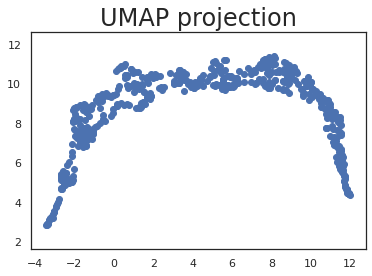

In [61]:
yenc = [0,0,1,1,2,2,2]
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in list(X.columns)])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

In [3]:
import pandas as pd

tumor_data = pd.read_csv("~/ssdhome/PythonProjects/maldi_ml/tumor_23_groups_export_for_SOM_normalized.csv", index_col=0)

In [6]:
from sklearn.mixture import GaussianMixture

X_gmm = tumor_data.drop('label', axis=1)

gmm = GaussianMixture(n_components=2)
gmm.fit(X_gmm)

GaussianMixture(n_components=2)

In [9]:
import matplotlib.pyplot as plt

labels = gmm.predict(X_gmm)
plt.scatter(X_gmm[:, 0], X_gmm[:, 1], c=labels, cmap='viridis');

TypeError: '(slice(None, None, None), 0)' is an invalid key

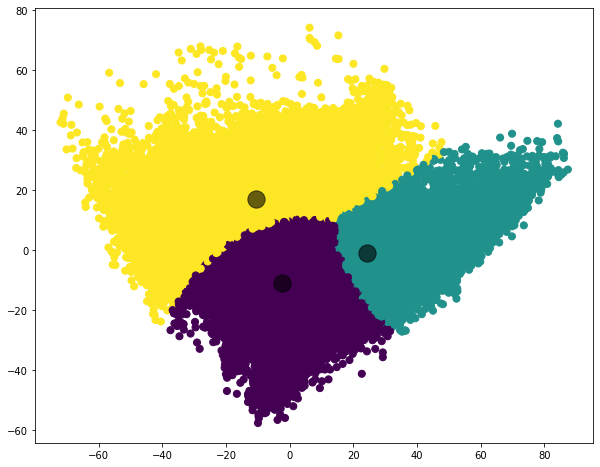

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import multivariate_normal as mvn


sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_gmm)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [22]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import multivariate_normal as mvn

Y_sklearn = X_gmm.copy()
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X_gmm)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)



In [24]:
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

KeyError: 29405

In [23]:
centers

array([[0., 0.],
       [0., 0.],
       [0., 0.]])